<a href="https://www.kaggle.com/code/dataapari/linear-regression?scriptVersionId=100603448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression-task-tsf/student_scores%20-%20student_scores.csv


 # Predict marks of students based on the number of hours they have studied.
 We will break down the problem in four parts :
1. State the problem.
2. Describe the data and select an approach.
3. Do the analysis.
4. Summarize the results.

**State the problem** Does the number of hours a student has put into learning effect his marks. Can we predict the marks of a student based on the number of hours a student has put in.

**Describe the data and select an approach.** We'll fit least square regression with a linear equation to see how the number of hours a student study is related to the marks obtained. Number of hours is an explanatory variable and marks obtained is the responce. 

In [2]:
#Read the data
df = pd.read_csv('../input/linear-regression-task-tsf/student_scores%20-%20student_scores.csv')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

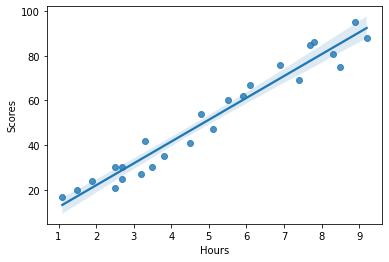

In [3]:
# Visulally analyse the relationship between Hours and Scores
import seaborn as sns
sns.regplot(x = df['Hours'], y = df['Scores'] )

We can see a positive slop which means the one scores more by putting more hours in studying. Slope(b_1) tells how scores change with each extra hour one puts into. The relationship between Hours and Scores is linear as evident from the scatterplot.
**But**, there are obvious **lurking variables**. This analysis ignores the concentration of student during the study hours and relevance of the material they studied.


**Do the Analysis** 

In [4]:
# Defining X and y
#X = df.loc[:,'Hours']
#y = df.loc[:,'Scores']
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values  
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


 y = 9.91*X + 2.02
r^2 =  0.9515510725211552
RMSE =  5.186601709180373


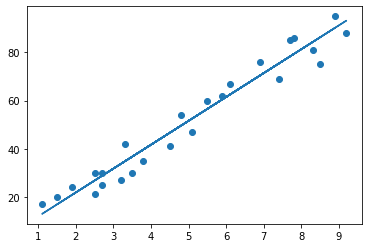

In [7]:
# Plotting the regression line
import matplotlib.pyplot as plt
from sklearn import metrics
line = regressor.coef_*X + regressor.intercept_
b_1 = round(regressor.coef_[0],2)
b_0 = round(regressor.intercept_,2)
print(" y = {}*X + {}".format(b_1, b_0  )   )
print("r^2 = ", regressor.score(X_train,y_train))
y_pred = regressor.predict(X_train)
rmse = metrics.mean_absolute_error(y_train,y_pred)
print("RMSE = ",rmse)
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Using r^2 and S_e to summarize the fit of the equation. 
using r^2, we can say that 95% of the variation in score is associated with variation in study hours, rest 5% is determined by other factors.
Standerd error of residuals is 5.19 which suggests by empirical rule that 2/3rd of the student's marks lies within +/- 5. 
b_1 suggests that estimated average increase in marks by 9.9 marks for each additonal hour put in studying.
b_0 suggest that a student will get 2 marks even when he didn't study at all. 

<AxesSubplot:>

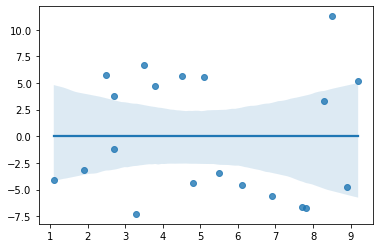

In [8]:
# Residual analysis
e = y_pred - y_train 
sns.regplot(x = X_train, y = e)
# Randon residual variation, but you can see there is an outlier at 8.

In [9]:
# Evaluating the model 
y_pred = regressor.predict(X_test)
rmse = metrics.mean_absolute_error(y_test,y_pred)
print("RMSE = ",round(rmse,2))

RMSE =  4.18
